In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd 'drive/My Drive/Siamese/Place'

/content/drive/My Drive/Siamese/Place


In [ ]:
import sys
sys.path.insert(0, '../Data')
sys.path.insert(0, '../Encoder')
sys.path.insert(0, '../Encoder/Freq')
sys.path.insert(0, '../Encoder/Time')
sys.path.insert(0, '../Speaker')
sys.path.insert(0, '../Conference')
sys.path.insert(0, '..')
sys.path.insert(0, '..')
sys.path.insert(0, '../Place')

In [ ]:
!pip install torchaudio

     |████████████████████████████████| 6.7MB 4.5MB/s 


In [ ]:
import os
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm

In [ ]:
DATASET_PATH = '/content/drive/My Drive/DataSet'
EPOCH_NUM = 10

torch.backends.cudnn.deterministic = True

NUM_WORKERS = 4

In [ ]:
from IdentificationDataset import IdentificationDataset
from IdentificationDataset import ReturnType
from torchvision.transforms import Compose

from Normalize import Normalize
from ToTensor import ToTensor

DATASET_PATH = '/content/drive/My Drive/DataSet'

transforms = Compose([
    Normalize(),
    ToTensor()
])

NUM_CLASSES = 20

trainset = IdentificationDataset(DATASET_PATH, 
                                 NUM_CLASSES,
                                 encode=False,
                                 train=True, 
                                 transform=transforms,
                                 lenght=3,
                                 return_type=ReturnType.STANDARD)
trainsetloader = torch.utils.data.DataLoader(trainset, 
                                             batch_size=1, 
                                             num_workers=NUM_WORKERS, 
                                             shuffle=True)

testset = IdentificationDataset(DATASET_PATH, 
                                NUM_CLASSES,
                                encode=False,
                                train=False, 
                                transform=transforms,
                                lenght=3,
                                return_type=ReturnType.STANDARD)

testsetloader = torch.utils.data.DataLoader(testset, 
                                            batch_size=1, 
                                            num_workers=NUM_WORKERS)

print("lenght test loader ", len(testsetloader))


sample lenght  3
sample lenght  3
lenght test loader  258


In [ ]:
from Conference import Conference

# Define default device, we should use the GPU (cuda) if available
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Conference(DEVICE, time=False)
net.to(DEVICE)

Conference(
  (encoder): TransFourier(
    (spectrogram): Spectrogram()
    (amp): AmplitudeToDB()
    (block1): Conv2DBlock(
      (conv1): Conv2d(1, 32, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Conv2d(1, 96, kernel_size=(7, 7), stride=(2, 1), padding=(3, 3))
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (maxpool): MaxPool2d(kernel_size=(4, 4), stride=(4, 4), padding=0, dilation=1, ceil_mode=False)
    )
    (block2): Conv2DBlock(
      (conv1): Conv2d(128, 64, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Conv2d(128, 192, kernel_size=(5, 5), stride=(2, 1), padding=(2, 2))
      (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (maxpool): MaxPool2d(kernel_size=(4, 2), stride=(4, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (block3): Conv2DBlock(
      (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Co

In [ ]:
with torch.no_grad():
  # test
  net.eval()
  # Store the places
  speakers_list = testset.get_speakers_list(20)
  net.load_encoder()
  net.initspeakers(speakers_list)  
  net.initplaces(speakers_list, maxsize=3)

Encoder loaded


*** Epoch  0  ***
*** Train ***


1876it [03:42,  8.43it/s]

accuracy mean  0.261727078891258 topk 0.6066098081023454  min  0.6337953091684435
Error  0.39339019189765456
{270: 12, 272: 56, 273: 46, 274: 10, 275: 40, 276: 20, 277: 79, 278: 2, 271: 73, 279: 90, 280: 40, 281: 46, 282: 18, 283: 42, 285: 93, 284: 17, 286: 52, 287: 76, 288: 44, 289: 28}
*** Test ***



258it [00:15, 16.15it/s]


accuracy final_mean  0.9418604651162791  final_min  0.9263565891472868


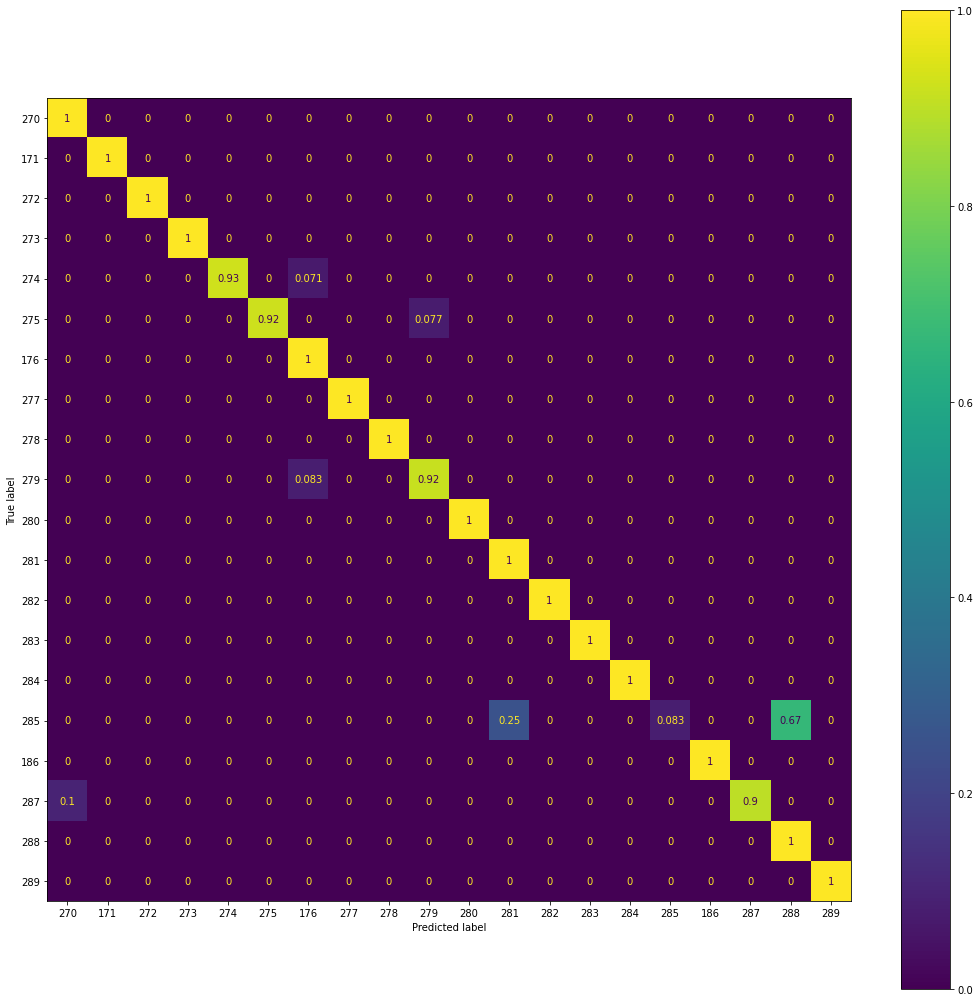

*** Epoch  1  ***
*** Train ***


1876it [00:32, 57.96it/s]

accuracy mean  0.5479744136460555 topk 0.7372068230277186  min  0.7254797441364605
Error  0.26279317697228144
{270: 13, 272: 53, 273: 34, 274: 10, 275: 18, 276: 13, 277: 48, 278: 2, 271: 32, 279: 37, 280: 65, 281: 39, 282: 10, 283: 38, 285: 48, 284: 12, 286: 7, 287: 44, 288: 36, 289: 31}
*** Test ***



258it [00:03, 75.76it/s]


accuracy final_mean  0.9534883720930233  final_min  0.9496124031007752


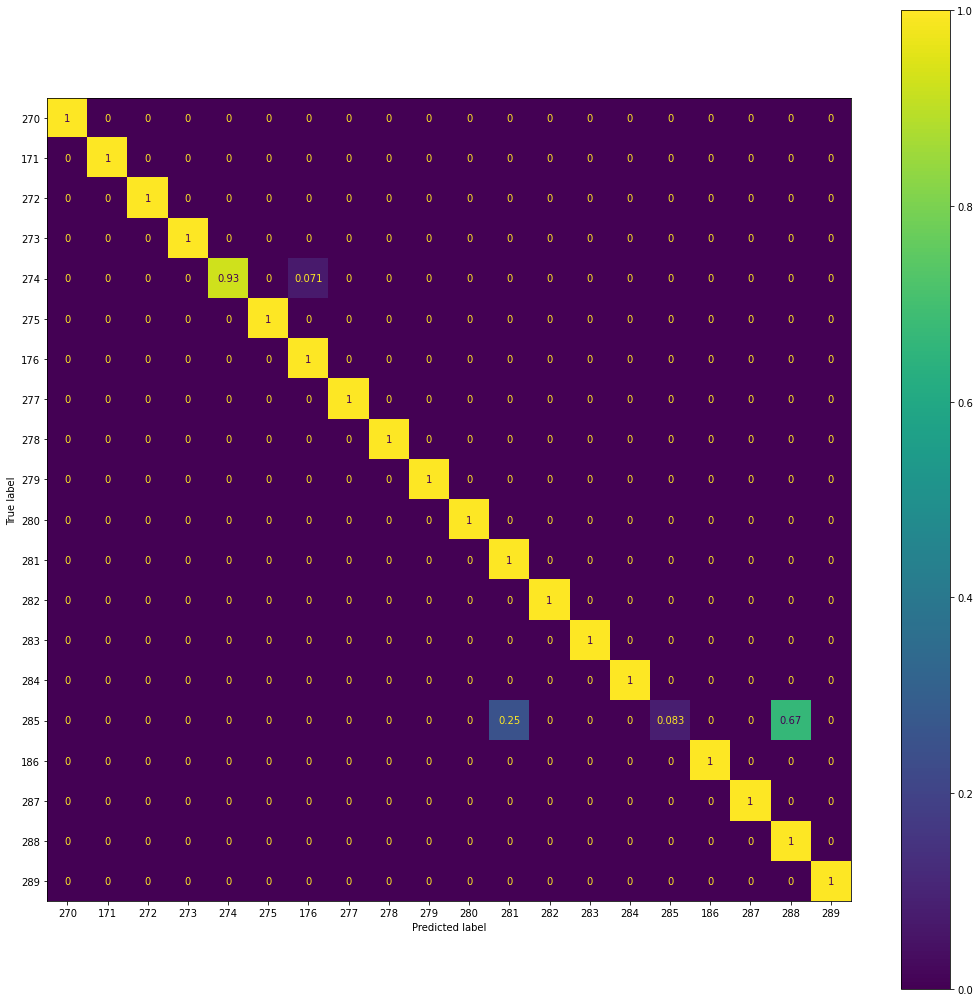

*** Epoch  2  ***
*** Train ***


1876it [00:31, 60.02it/s]

accuracy mean  0.6391257995735607 topk 0.7654584221748401  min  0.7436034115138592
Error  0.2345415778251599
{270: 11, 272: 56, 273: 43, 274: 0, 275: 11, 276: 14, 277: 29, 278: 5, 271: 16, 279: 13, 280: 57, 281: 46, 282: 12, 283: 32, 285: 22, 284: 18, 286: 8, 287: 26, 288: 11, 289: 36}
*** Test ***



258it [00:03, 76.44it/s]


accuracy final_mean  0.9457364341085271  final_min  0.9534883720930233


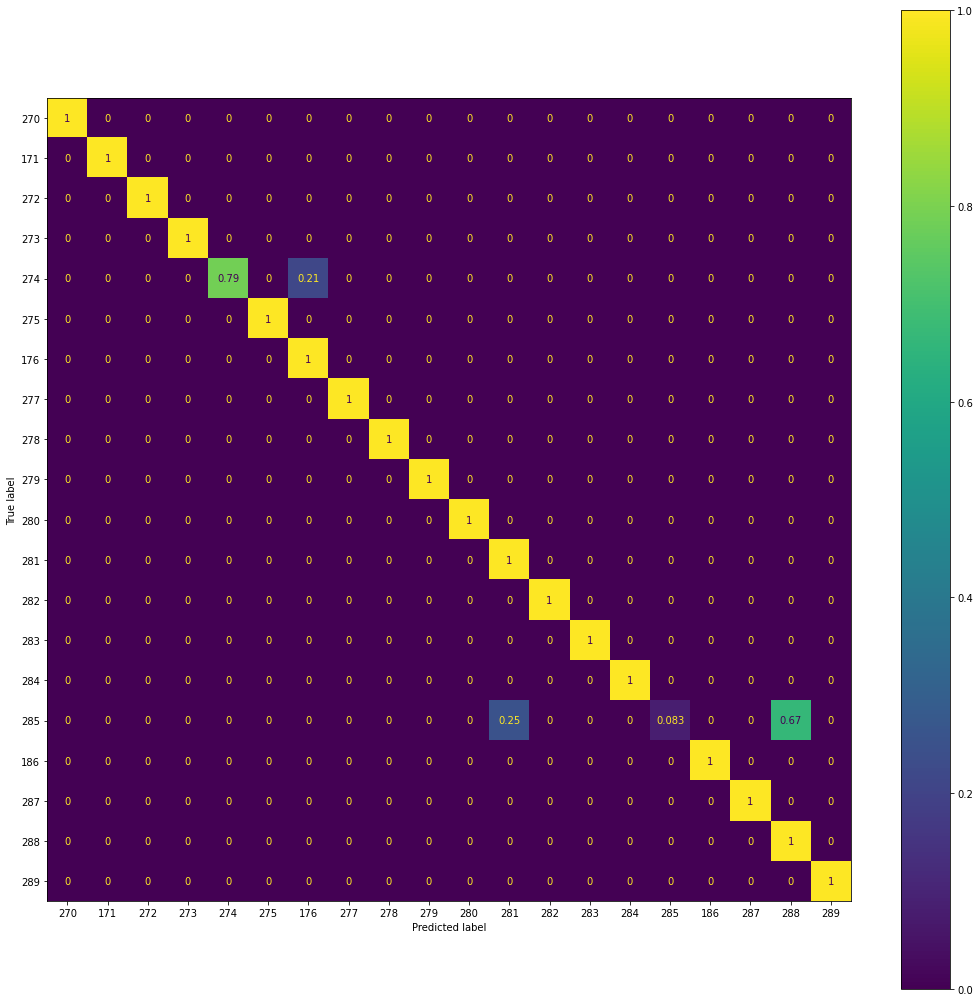

*** Epoch  3  ***
*** Train ***


1876it [00:31, 60.17it/s]

accuracy mean  0.685501066098081 topk 0.7457356076759062  min  0.7452025586353944
Error  0.2542643923240938
{270: 20, 272: 53, 273: 41, 274: 2, 275: 11, 276: 13, 277: 25, 278: 6, 271: 13, 279: 17, 280: 67, 281: 54, 282: 14, 283: 39, 285: 18, 284: 22, 286: 5, 287: 26, 288: 16, 289: 42}
*** Test ***



258it [00:03, 76.26it/s]


accuracy final_mean  0.9186046511627907  final_min  0.9418604651162791


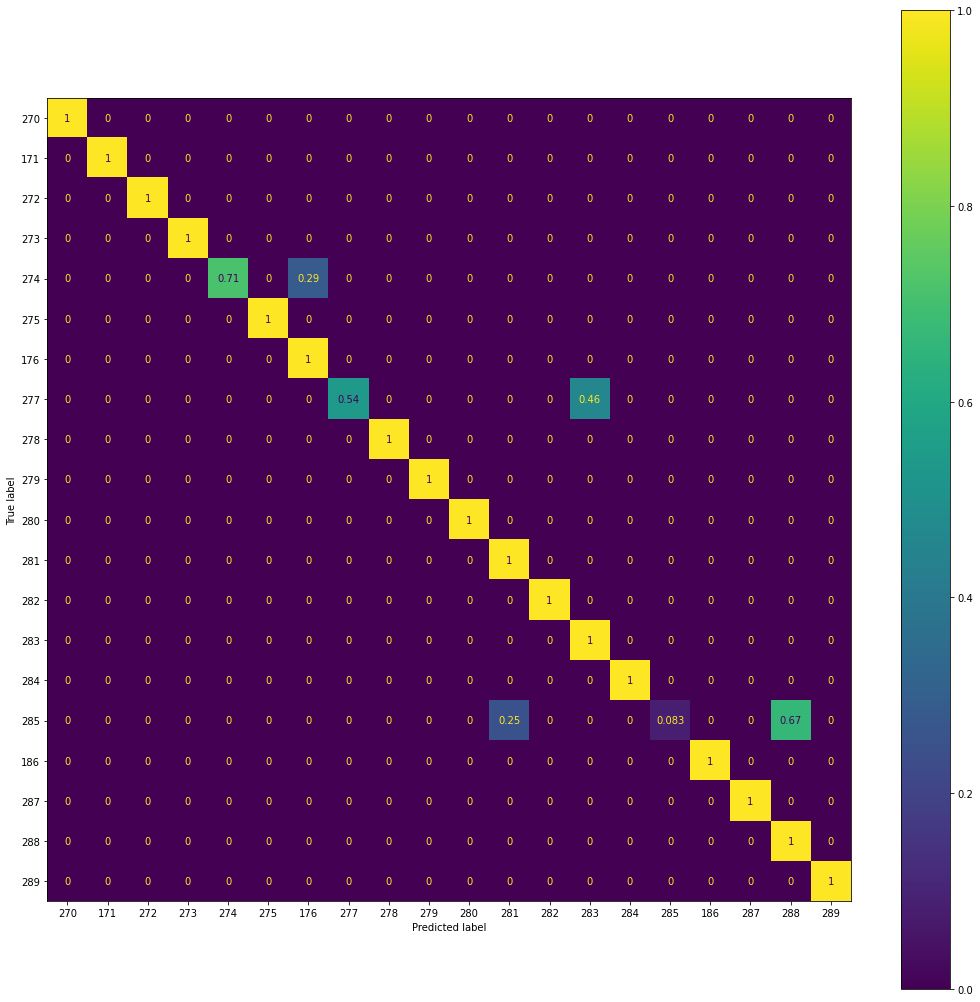

*** Epoch  4  ***
*** Train ***


1876it [00:30, 60.79it/s]

accuracy mean  0.6982942430703625 topk 0.7505330490405118  min  0.747867803837953
Error  0.24946695095948826
{270: 20, 272: 51, 273: 43, 274: 2, 275: 13, 276: 10, 277: 20, 278: 4, 271: 21, 279: 15, 280: 67, 281: 45, 282: 10, 283: 43, 285: 24, 284: 17, 286: 9, 287: 23, 288: 19, 289: 28}
*** Test ***



258it [00:03, 76.14it/s]


accuracy final_mean  0.9147286821705426  final_min  0.937984496124031


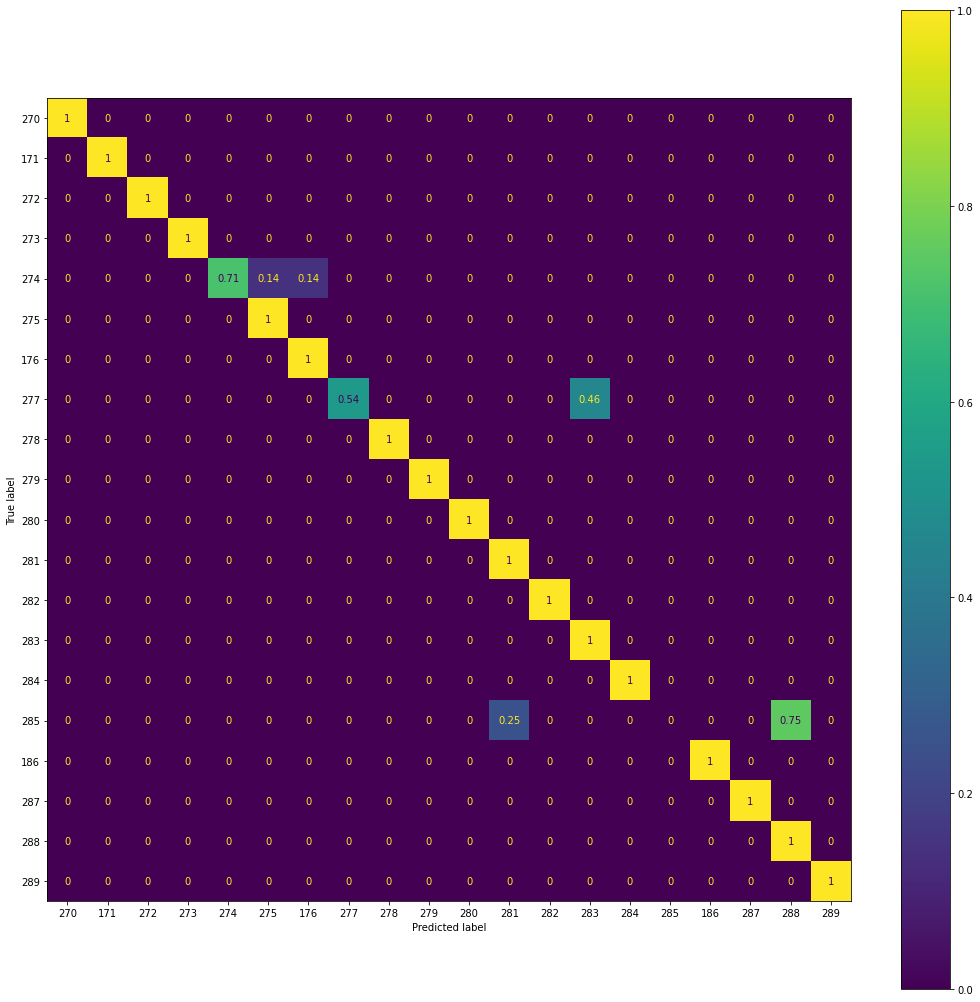

*** Epoch  5  ***
*** Train ***


1876it [00:30, 61.38it/s]

accuracy mean  0.6881663113006397 topk 0.740405117270789  min  0.7238805970149254
Error  0.2595948827292111
{270: 18, 272: 43, 273: 51, 274: 2, 275: 13, 276: 13, 277: 11, 278: 8, 271: 18, 279: 15, 280: 63, 281: 57, 282: 8, 283: 35, 285: 23, 284: 28, 286: 7, 287: 26, 288: 27, 289: 35}
*** Test ***



258it [00:03, 75.49it/s]


accuracy final_mean  0.9147286821705426  final_min  0.9302325581395349


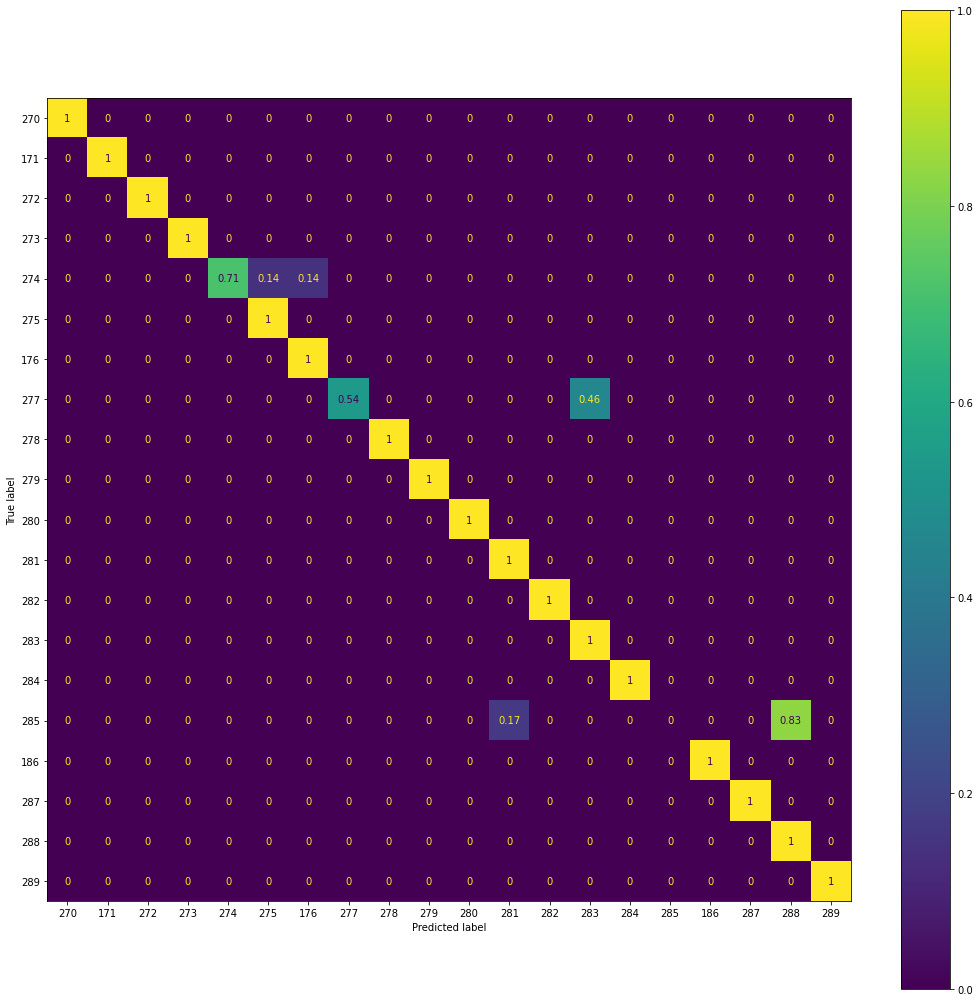

*** Epoch  6  ***
*** Train ***


1876it [00:31, 59.98it/s]

accuracy mean  0.6950959488272921 topk 0.7334754797441365  min  0.7254797441364605
Error  0.26652452025586354
{270: 17, 272: 48, 273: 48, 274: 5, 275: 13, 276: 15, 277: 16, 278: 6, 271: 19, 279: 17, 280: 65, 281: 61, 282: 12, 283: 39, 285: 18, 284: 37, 286: 5, 287: 28, 288: 19, 289: 34}
*** Test ***



258it [00:03, 74.61it/s]


accuracy final_mean  0.9147286821705426  final_min  0.9224806201550387


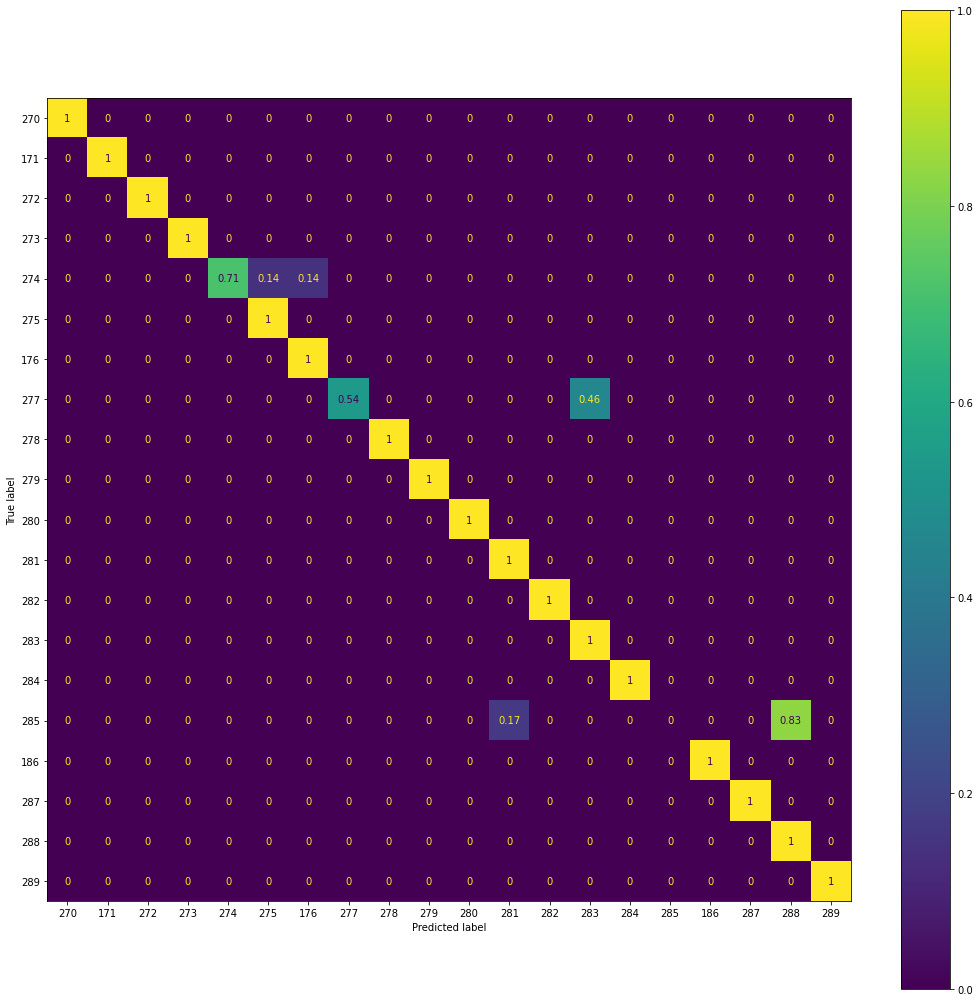

*** Epoch  7  ***
*** Train ***


1876it [00:30, 60.77it/s]

accuracy mean  0.685501066098081 topk 0.7350746268656716  min  0.7297441364605544
Error  0.26492537313432835
{270: 18, 272: 33, 273: 49, 274: 5, 275: 14, 276: 14, 277: 14, 278: 6, 271: 21, 279: 15, 280: 71, 281: 57, 282: 12, 283: 39, 285: 22, 284: 33, 286: 8, 287: 26, 288: 11, 289: 35}
*** Test ***



258it [00:03, 78.63it/s]


accuracy final_mean  0.9031007751937985  final_min  0.9147286821705426


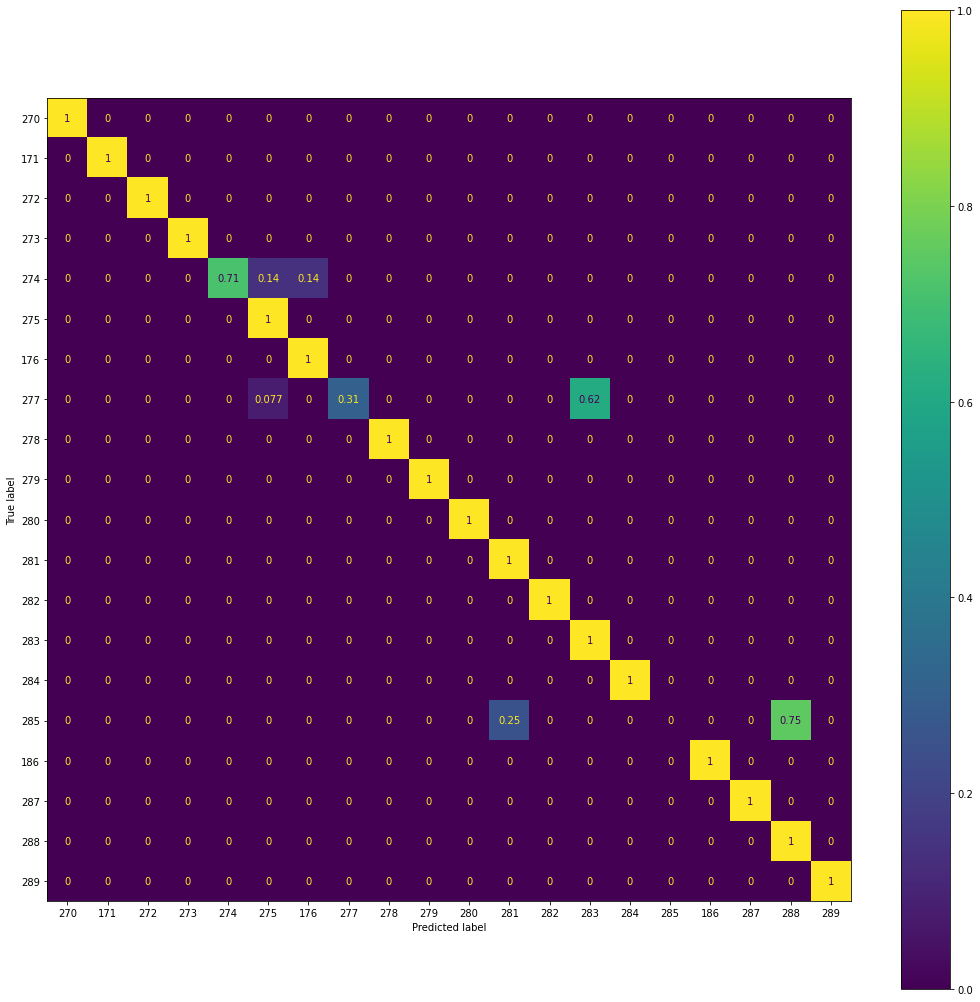

*** Epoch  8  ***
*** Train ***


1876it [00:30, 61.00it/s]

accuracy mean  0.6823027718550106 topk 0.7340085287846482  min  0.7164179104477612
Error  0.2659914712153518
{270: 19, 272: 38, 273: 43, 274: 2, 275: 9, 276: 18, 277: 14, 278: 8, 271: 19, 279: 11, 280: 65, 281: 54, 282: 14, 283: 44, 285: 20, 284: 40, 286: 10, 287: 23, 288: 8, 289: 28}
*** Test ***



258it [00:03, 76.80it/s]


accuracy final_mean  0.9031007751937985  final_min  0.9147286821705426


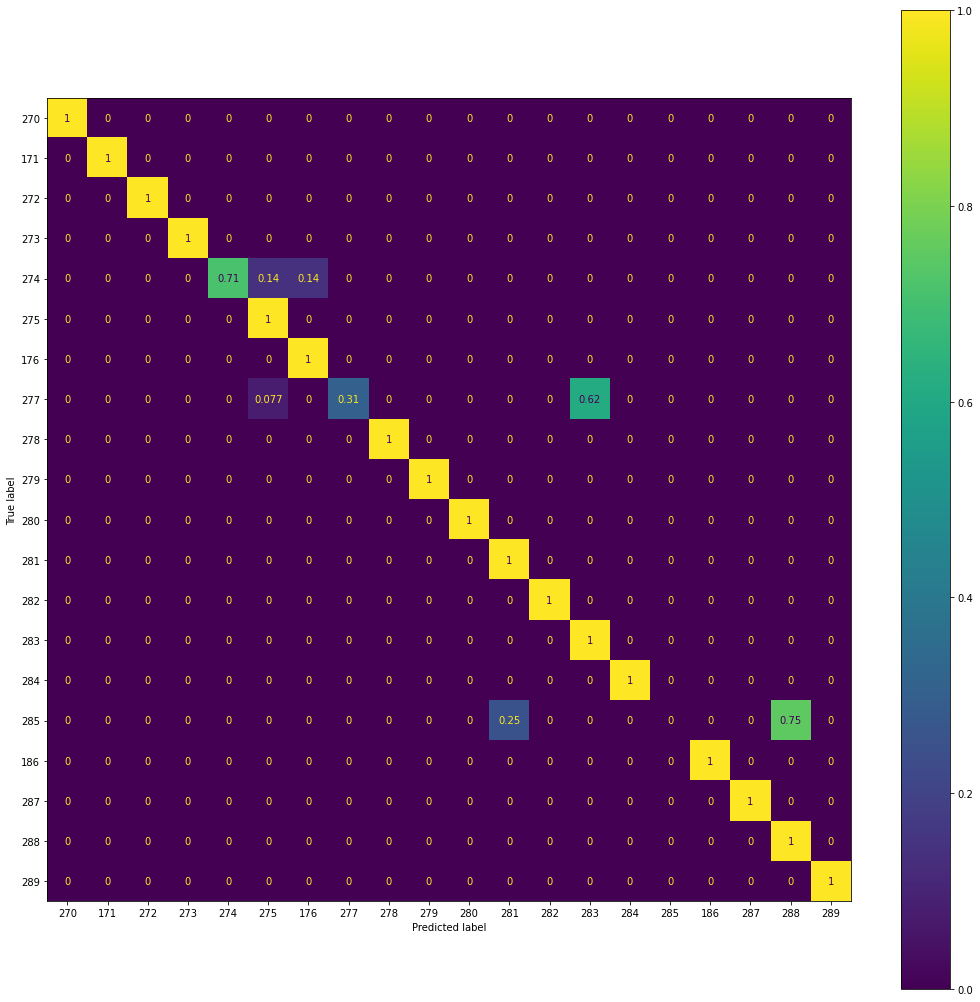

*** Epoch  9  ***
*** Train ***


1876it [00:31, 60.50it/s]

accuracy mean  0.6961620469083155 topk 0.732409381663113  min  0.7052238805970149
Error  0.267590618336887
{270: 20, 272: 35, 273: 45, 274: 7, 275: 11, 276: 16, 277: 11, 278: 9, 271: 19, 279: 17, 280: 65, 281: 50, 282: 14, 283: 40, 285: 22, 284: 36, 286: 13, 287: 26, 288: 8, 289: 36}
*** Test ***



258it [00:03, 76.95it/s]


accuracy final_mean  0.8992248062015504  final_min  0.9147286821705426


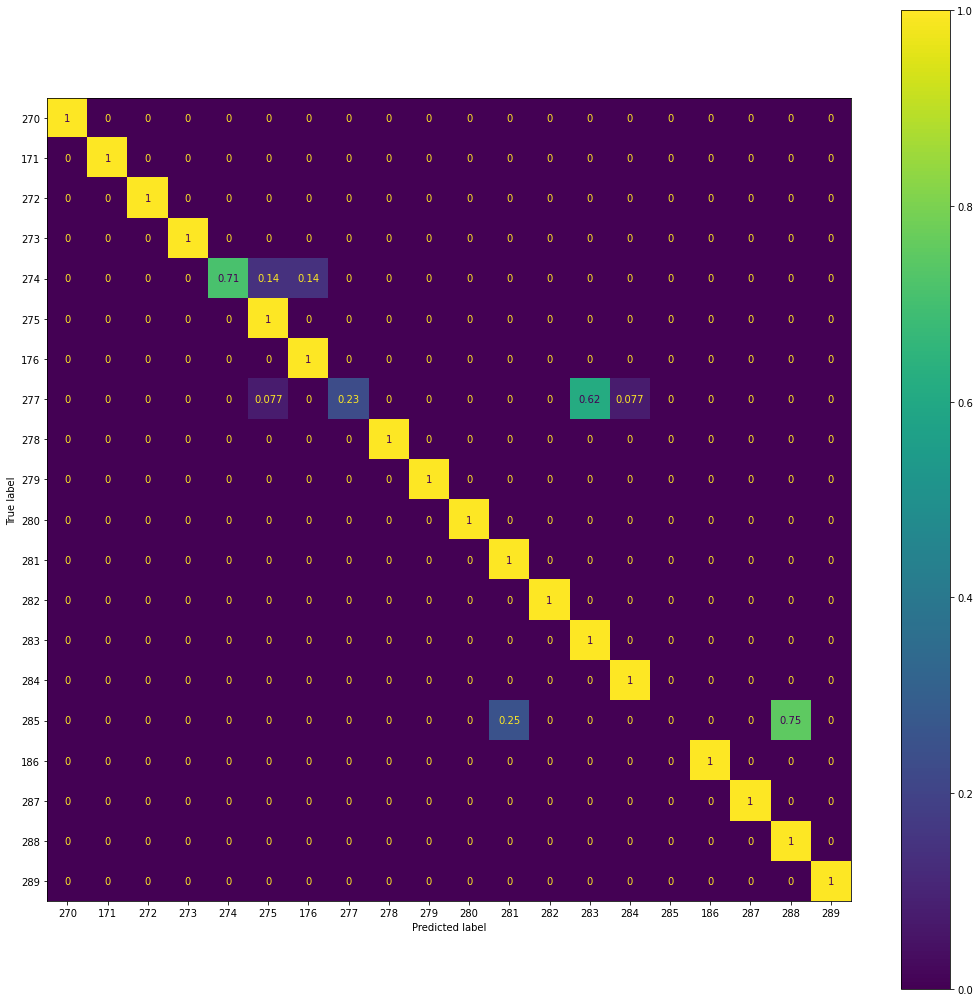

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

dict_error = {}
dict_nb = {}

conf_gold_label = None
conf_pred_label = None

with torch.no_grad():
  best_accuracy = 0
  mean_accuracies = []
  topk_accuracies = []
  min_accuracies = []
  final_mean_accuracies = []
  final_min_accuracies = []
  # Confusion matrix
  conf_gold_label = []
  conf_pred_label = []

  for epoch_num in range(EPOCH_NUM):
    print("*** Epoch ", epoch_num, " ***")
    # train
    print("*** Train ***")
    mean_accuracy = 0
    topk_accuracy = 0
    min_accuracy = 0
    nb_test = 0

    for speaker in speakers_list:
      id = speaker[0]
      dict_error[id] = 0
      dict_nb[id] = 0

    for iter_num, (gold_label, sample) in tqdm(enumerate(trainsetloader)):
      gold_label = gold_label.item()
      # Election day the network need to have the saple and the gold label
      mean_label, topk_label, min_label = net(sample, gold_label)

      nb_test += 1
      dict_nb[gold_label] += 1

      if gold_label == mean_label:
        mean_accuracy += 1
      if gold_label == topk_label:
        topk_accuracy += 1
      else:
        dict_error[gold_label] += 1
      if gold_label == min_label:
        min_accuracy += 1

    mean_accuracy /= nb_test
    topk_accuracy /= nb_test
    min_accuracy /= nb_test
    mean_accuracies.append(mean_accuracy)
    topk_accuracies.append(topk_accuracy)
    min_accuracies.append(min_accuracy)
    print("accuracy mean ", mean_accuracy, "topk", topk_accuracy, 
          " min ", min_accuracy)
    add = 0
    nb = 0
    for id in dict_error:
      add += dict_error[id]
      nb += dict_nb[id]
      dict_error[id] =  100 * dict_error[id]//dict_nb[id] 
    print("Error ", add/nb)
    print(dict_error)
    
    # test
    print("*** Test ***")
    final_mean_accuracy = 0
    final_min_accuracy = 0
    nb_test = 0
    conf_gold_label.clear()
    conf_pred_label.clear()

    for iter_num, (gold_label, sample) in tqdm(enumerate(testsetloader)):
      gold_label = gold_label.item()
      # Speaker identification network need to have the sample and the place
      final_mean_label, final_min_label = net(sample, place_id=gold_label)
      conf_gold_label.append(gold_label)
      conf_pred_label.append(final_mean_label)      
      nb_test += 1
      dict_nb[gold_label] += 1

      if gold_label == final_mean_label:
        final_mean_accuracy += 1
      if gold_label == final_min_label:
        final_min_accuracy += 1

    final_mean_accuracy /= nb_test
    final_min_accuracy /= nb_test
    final_mean_accuracies.append(final_mean_accuracy)
    final_min_accuracies.append(final_min_accuracy)
    print("accuracy final_mean ", final_mean_accuracy, 
          " final_min ", final_min_accuracy)

    cm = confusion_matrix(conf_gold_label, conf_pred_label, normalize='true')
    fig, ax = plt.subplots(figsize=(18, 18))
    disp = ConfusionMatrixDisplay(cm, [270, 171, 272, 273, 274, 275, 176, 277, 278, 279, 280, 281, 282, 283, 284, 285, 186, 287, 288, 289]).plot(ax=ax)
    plt.show()

  net.store_speakers(20, 3)

In [ ]:
print("maximum of min", round(np.max(min_accuracies), 3))
print("maximum of topk", round(np.max(topk_accuracies), 3))
print("maximum of mean", round(np.max(mean_accuracies), 3))
print("maximum of final mean", round(np.max(final_mean_accuracies), 3))
print("maximum of final min", round(np.max(final_min_accuracies), 3))

maximum of min 0.748
maximum of topk 0.765
maximum of mean 0.698
maximum of final mean 0.953
maximum of final min 0.953


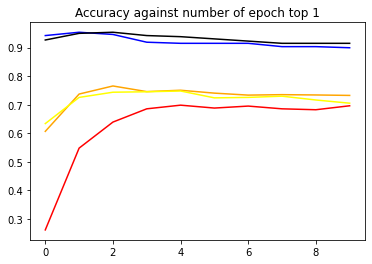

In [ ]:
import matplotlib.pyplot as plt

plt.title("Accuracy against number of epoch top 1")
plt.plot([i for i in range(EPOCH_NUM)], mean_accuracies , label='test 1', color='red')
plt.plot([i for i in range(EPOCH_NUM)], topk_accuracies , label='test 1', color='orange')
plt.plot([i for i in range(EPOCH_NUM)], min_accuracies , label='test 1', color='yellow')
plt.plot([i for i in range(EPOCH_NUM)], final_mean_accuracies , label='test 1', color='blue')
plt.plot([i for i in range(EPOCH_NUM)], final_min_accuracies , label='test 1', color='black')

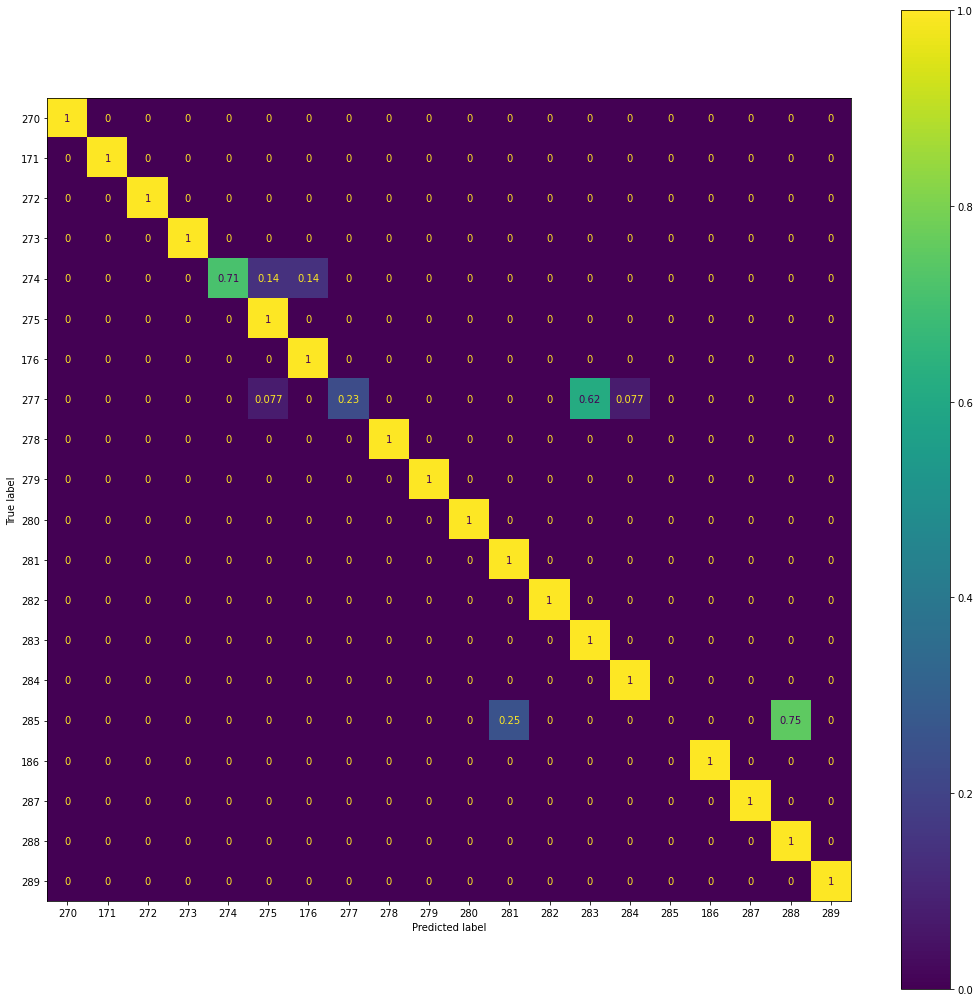

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(conf_gold_label, conf_pred_label, normalize='true')
fig, ax = plt.subplots(figsize=(18, 18))
disp = ConfusionMatrixDisplay(cm, [270, 171, 272, 273, 274, 275, 176, 277, 278, 279, 280, 281, 282, 283, 284, 285, 186, 287, 288, 289]).plot(ax=ax)
plt.show()